In [53]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
%matplotlib inline
# sns.set_style()

In [23]:
data = pd.read_csv('../data/data.csv',index_col=None)

In [24]:
data.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label
0,321.0,5.0,-17.661,32.245,65.231,-0.460,-0.266,-0.847,26.0,0.0,0
1,1653.0,23.0,11.595,85.465,65.459,-0.955,-0.000,0.296,27.0,0.0,0
2,275.0,9.0,-36.464,67.166,160.189,0.415,0.720,-0.556,26.0,0.0,0
3,1660.0,23.0,61.660,101.635,169.059,-0.955,-0.000,0.296,26.0,0.0,0
4,966.0,16.0,-54.510,-78.323,94.341,-0.827,0.478,-0.296,24.0,0.0,0


In [4]:
data.describe()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label
count,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07
mean,1.035732e+03,1.601316e+01,1.168440e-02,-1.597919e-02,1.171977e+02,2.011426e-04,-5.647887e-05,-1.950327e-01,2.643196e+01,5.005158e+07,1.069192e-02
std,5.975225e+02,8.942257e+00,5.125232e+01,6.222670e+01,4.865413e+01,5.809819e-01,5.810460e-01,5.354773e-01,2.626465e+00,2.891125e+07,1.028475e-01
min,1.000000e+00,1.000000e+00,-9.462700e+01,-1.156000e+02,3.770000e+01,-9.550000e-01,-9.550000e-01,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.180000e+02,8.000000e+00,-4.501800e+01,-5.792500e+01,7.404100e+01,-4.780000e-01,-4.780000e-01,-5.560000e-01,2.500000e+01,2.500466e+07,0.000000e+00
50%,1.036000e+03,1.600000e+01,1.309000e+00,-4.184000e+00,1.217000e+02,0.000000e+00,-0.000000e+00,-2.960000e-01,2.600000e+01,5.004292e+07,0.000000e+00
75%,1.553000e+03,2.400000e+01,4.045200e+01,4.854100e+01,1.602410e+02,4.780000e-01,4.780000e-01,2.960000e-01,2.800000e+01,7.509229e+07,0.000000e+00
max,2.070000e+03,3.100000e+01,9.624300e+01,1.050240e+02,1.966110e+02,9.550000e-01,9.550000e-01,5.580000e-01,2.090000e+02,1.015914e+08,1.000000e+00


## Attribute Exploration

In [5]:
len(data.dom_id.unique())

2070

In [6]:
len(data.pmt_id.unique())

31

In [7]:
len(data.label.unique())

2

## Null Values

There are no null/na values

### Noise:Signal

In [ ]:
signal_len = len(data[data.label == 1]) 
noise_len = len(data[data.label == 0]) 
noise_signal_ratio = noise_len / signal_len
print("The noise:signal ratio is noted to be roughly {0}:{1}".format(round(noise_signal_ratio), 1))

# Positions `pos_x, pos_y, pos_z`

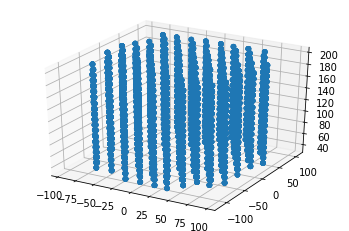

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data[:30000].pos_x, data[:30000].pos_y, data[:30000].pos_z)

In [34]:
data_dom = data.groupby(['dom_id']).count()

In [42]:
data_dom['pmt_id'].sort_values(ascending=False)

dom_id
1645.0    22747
1239.0    22658
1138.0    22649
1944.0    22642
1719.0    22613
          ...  
125.0     21725
541.0     21688
851.0     21662
952.0     21647
306.0     21607
Name: pmt_id, Length: 2070, dtype: int64

data_dom['pmt_id'].sort_values

The Doms with the largest amount of points are chosen for plotting to accommodate for large dataset :
1645, 1239, 1138, 1944, 1719

In [ ]:
# distribution of tot
# tot per label type

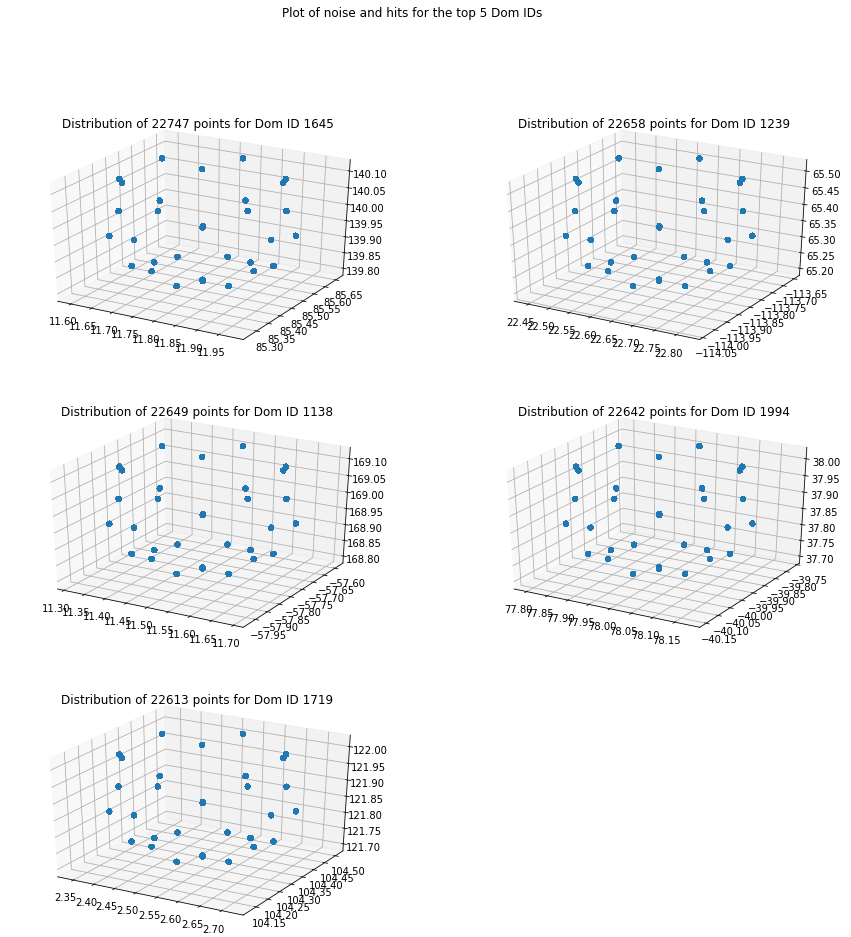

In [78]:
dom_id_list = [1645, 1239, 1138, 1944, 1719]

fig = plt.figure(figsize=(15, 15))
fig.suptitle("Plot of noise and hits for the top 5 Dom IDs")

ax = fig.add_subplot(321, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[0]].pos_x,
             data[data.dom_id == dom_id_list[0]].pos_y,
            data[data.dom_id == dom_id_list[0]].pos_z)
ax.set_title("Distribution of 22747 points for Dom ID 1645")

ax = fig.add_subplot(322, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[1]].pos_x,
             data[data.dom_id == dom_id_list[1]].pos_y,
            data[data.dom_id == dom_id_list[1]].pos_z)
ax.set_title("Distribution of 22658 points for Dom ID 1239")


ax = fig.add_subplot(323, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[2]].pos_x,
             data[data.dom_id == dom_id_list[2]].pos_y,
            data[data.dom_id == dom_id_list[2]].pos_z)
ax.set_title("Distribution of 22649 points for Dom ID 1138")


ax = fig.add_subplot(324, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[3]].pos_x,
             data[data.dom_id == dom_id_list[3]].pos_y,
            data[data.dom_id == dom_id_list[3]].pos_z)
ax.set_title("Distribution of 22642 points for Dom ID 1994")


ax = fig.add_subplot(325, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[4]].pos_x,
             data[data.dom_id == dom_id_list[4]].pos_y,
            data[data.dom_id == dom_id_list[4]].pos_z)
ax.set_title("Distribution of 22613 points for Dom ID 1719")

plt.savefig("../assets/pos_per_dom.png")

## Positions x, y, x for Hits

In [84]:
hits = data[data['label'] == 1]
hits.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label
18491,1054.0,15.0,-16.064,-76.599,112.441,0.000,0.955,-0.296,35.0,28449.0,1
18493,1054.0,28.0,-16.208,-76.707,112.611,-0.719,0.415,0.558,24.0,28450.0,1
18494,1053.0,27.0,-16.064,-76.624,122.011,0.000,0.830,0.558,12.0,28450.0,1
18495,1054.0,27.0,-16.064,-76.624,112.611,0.000,0.830,0.558,54.0,28450.0,1
18496,1054.0,21.0,-15.968,-76.625,112.559,0.478,0.827,0.296,47.0,28451.0,1


In [87]:
hits_dom = hits.groupby(['dom_id']).count()
hits_dom['pmt_id'].sort_values(ascending=False)

dom_id
437.0     354
855.0     350
1646.0    349
857.0     340
1715.0    339
         ... 
72.0      138
594.0     136
774.0     128
612.0     117
36.0      113
Name: pmt_id, Length: 2070, dtype: int64

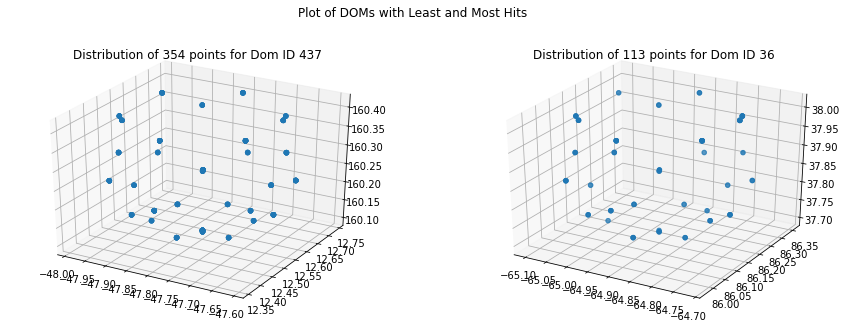

In [98]:
hits_dom_list = [437, 36]

fig = plt.figure(figsize=(15, 5))
fig.suptitle("Plot of DOMs with Least and Most Hits")

ax = fig.add_subplot(121, projection='3d')
ax.scatter3D(hits[hits.dom_id == hits_dom_list[0]].pos_x,
             hits[hits.dom_id == hits_dom_list[0]].pos_y,
            hits[hits.dom_id == hits_dom_list[0]].pos_z)
ax.set_title("Distribution of 354 points for Dom ID 437")

ax = fig.add_subplot(122, projection='3d')
ax.scatter3D(hits[hits.dom_id == hits_dom_list[1]].pos_x,
             hits[hits.dom_id == hits_dom_list[1]].pos_y,
            hits[hits.dom_id == hits_dom_list[1]].pos_z)
ax.set_title("Distribution of 113 points for Dom ID 36")

plt.savefig("../assets/hitspos_per_dom.png")

# Doms and PMT IDs

In [117]:
data = data.reset_index()

In [125]:
data[:20000].time.max()


31354.0

In [132]:
time_range = pd.Series(list(range(0, 10000000, 15000)))

In [133]:
pd.cut(data.time, time_range) 

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
45820211    NaN
45820212    NaN
45820213    NaN
45820214    NaN
45820215    NaN
Name: time, Length: 45820216, dtype: category
Categories (666, interval[int64]): [(0, 15000] < (15000, 30000] < (30000, 45000] < (45000, 60000] ... (9930000, 9945000] < (9945000, 9960000] < (9960000, 9975000] < (9975000, 9990000]]